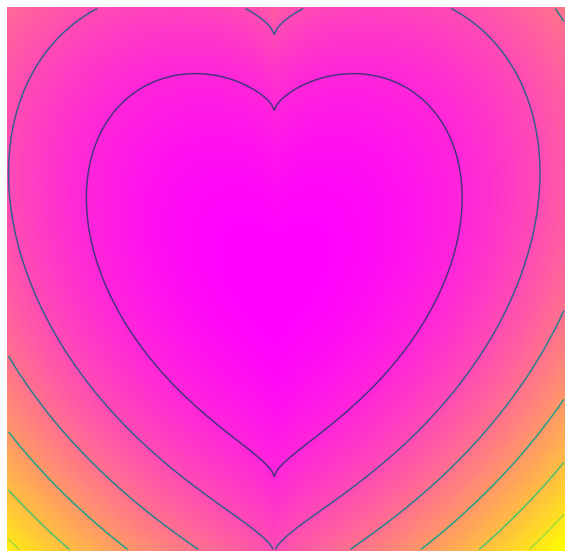

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X0, X1, dx = -10, 11, 0.1
Y0, Y1, dy = -10, 11, 0.1

x=np.arange(X0,X1,dx)
y=np.arange(Y1,Y0,-dy)

x,y=np.meshgrid(x,y)

f=x*x+y*y-2*y*(abs(x)**(2.0/3.0))+abs(x)**(4.0/3.0)


plt.figure(figsize=(10,10))
plt.contour(x,y,f)
plt.pcolormesh(x,y,f,shading='auto', cmap='spring')
plt.axis('off')
plt.savefig('hurt.png')
plt.show()

In [22]:
a=2.0
x0=0.0
y0=0.0
rr=np.sqrt((a-x0)*(a-x0)+y0*y0)

k=0
for i in range(0,370,1):
    th=np.radians(float(i))##角度をラジアンに直す
    xx=rr*np.cos(th)+x0
    yy=rr*np.sin(th)+y0    
    if k<1:
        x=np.array([xx])
        y=np.array([yy])
    else:
        x=np.append(x,[xx])
        y=np.append(y,[yy])
    k=k+1

z=x+1.j*y   #複素数に変換
w=z+(a*a)/z ##ジューコフスキー変換で円を直線に
xx=w.real
yy=w.imag


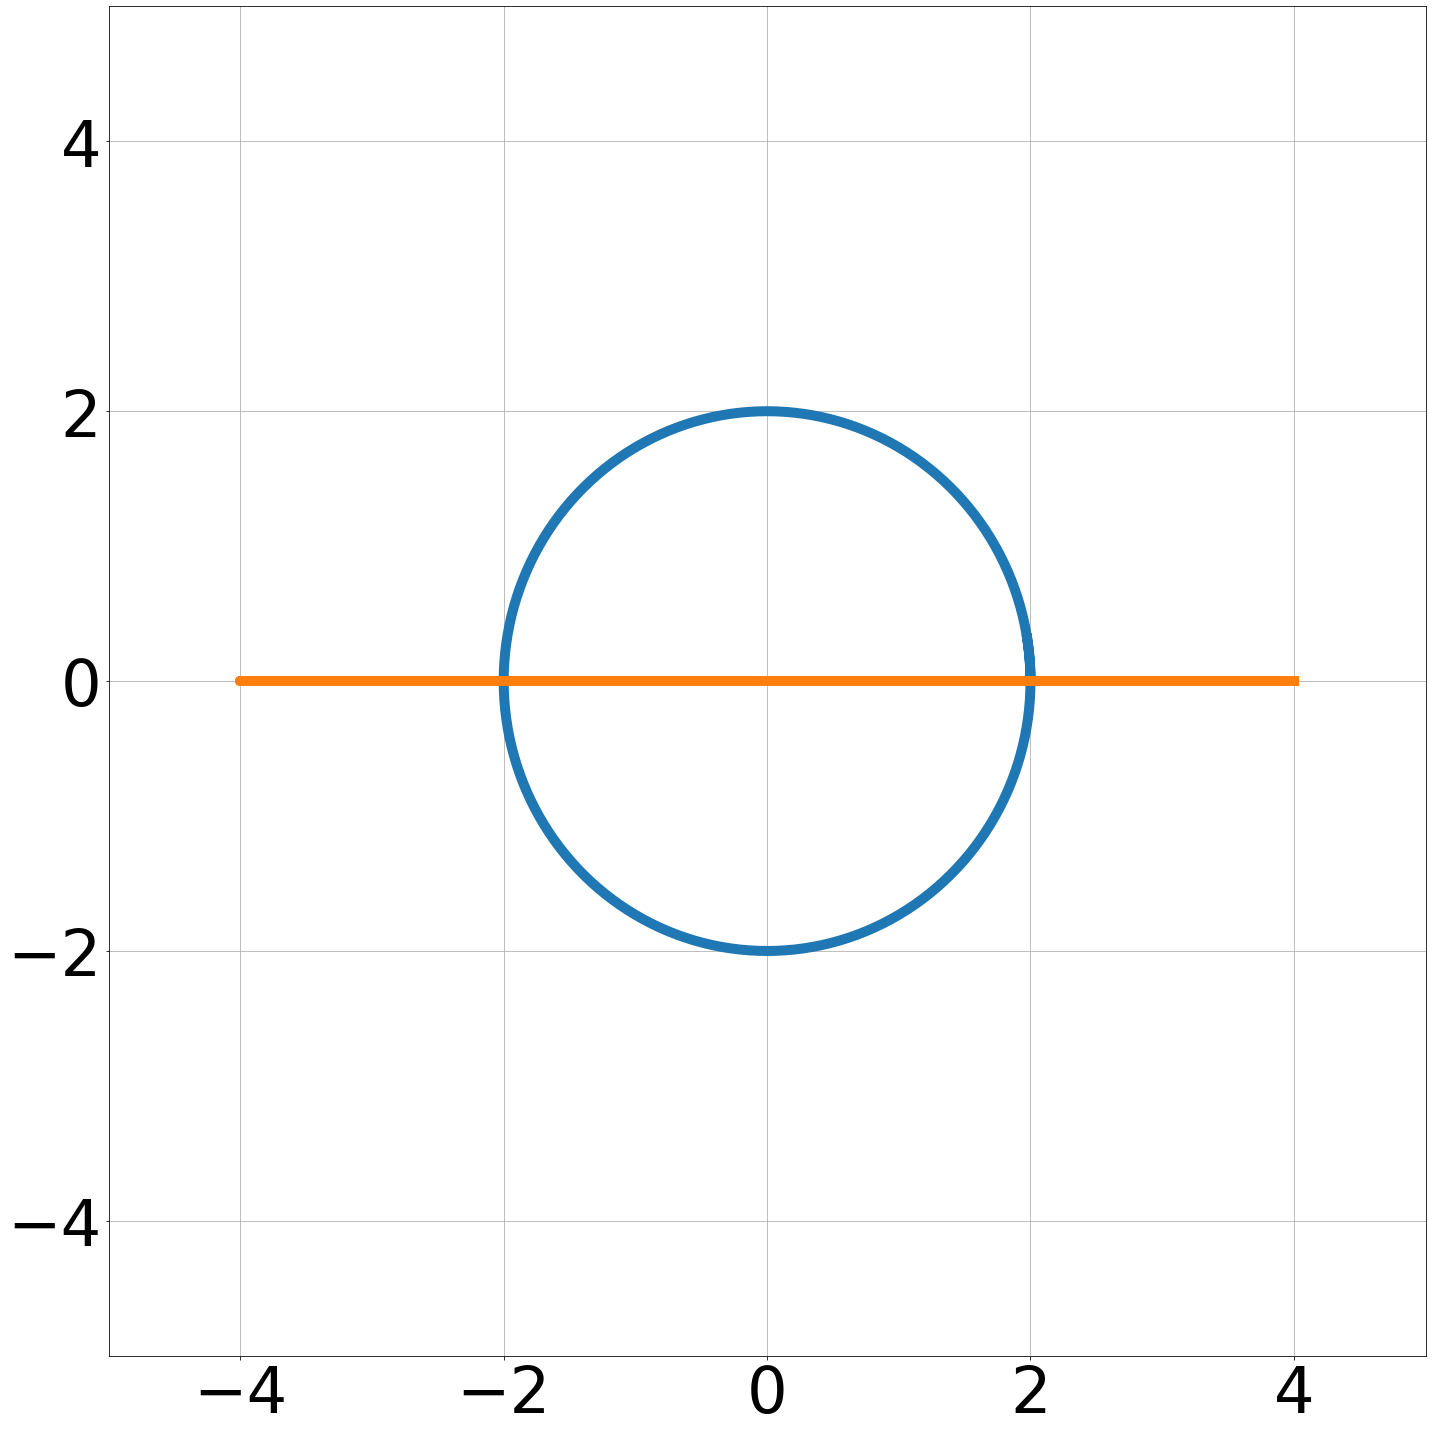

In [24]:
plt.figure(figsize=(20,20),tight_layout=True)
#plt.figure(figsize=(20,20))
plt.xlim(-5.0,5.0)
plt.ylim(-5.0,5.0)
plt.xticks(fontsize=64)
plt.yticks(fontsize=64)
plt.grid()
plt.plot(x,y,linewidth=10)
plt.plot(xx,yy,linewidth=10)
fname='q29.png'
plt.savefig(fname)
plt.show()


C:\Users\kouki\AppData\Local\Temp\ipykernel_14608\954226009.py:31: RuntimeWarning: invalid value encountered in sqrt
  nn=np.sqrt(u*u+v*v)


ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (8).

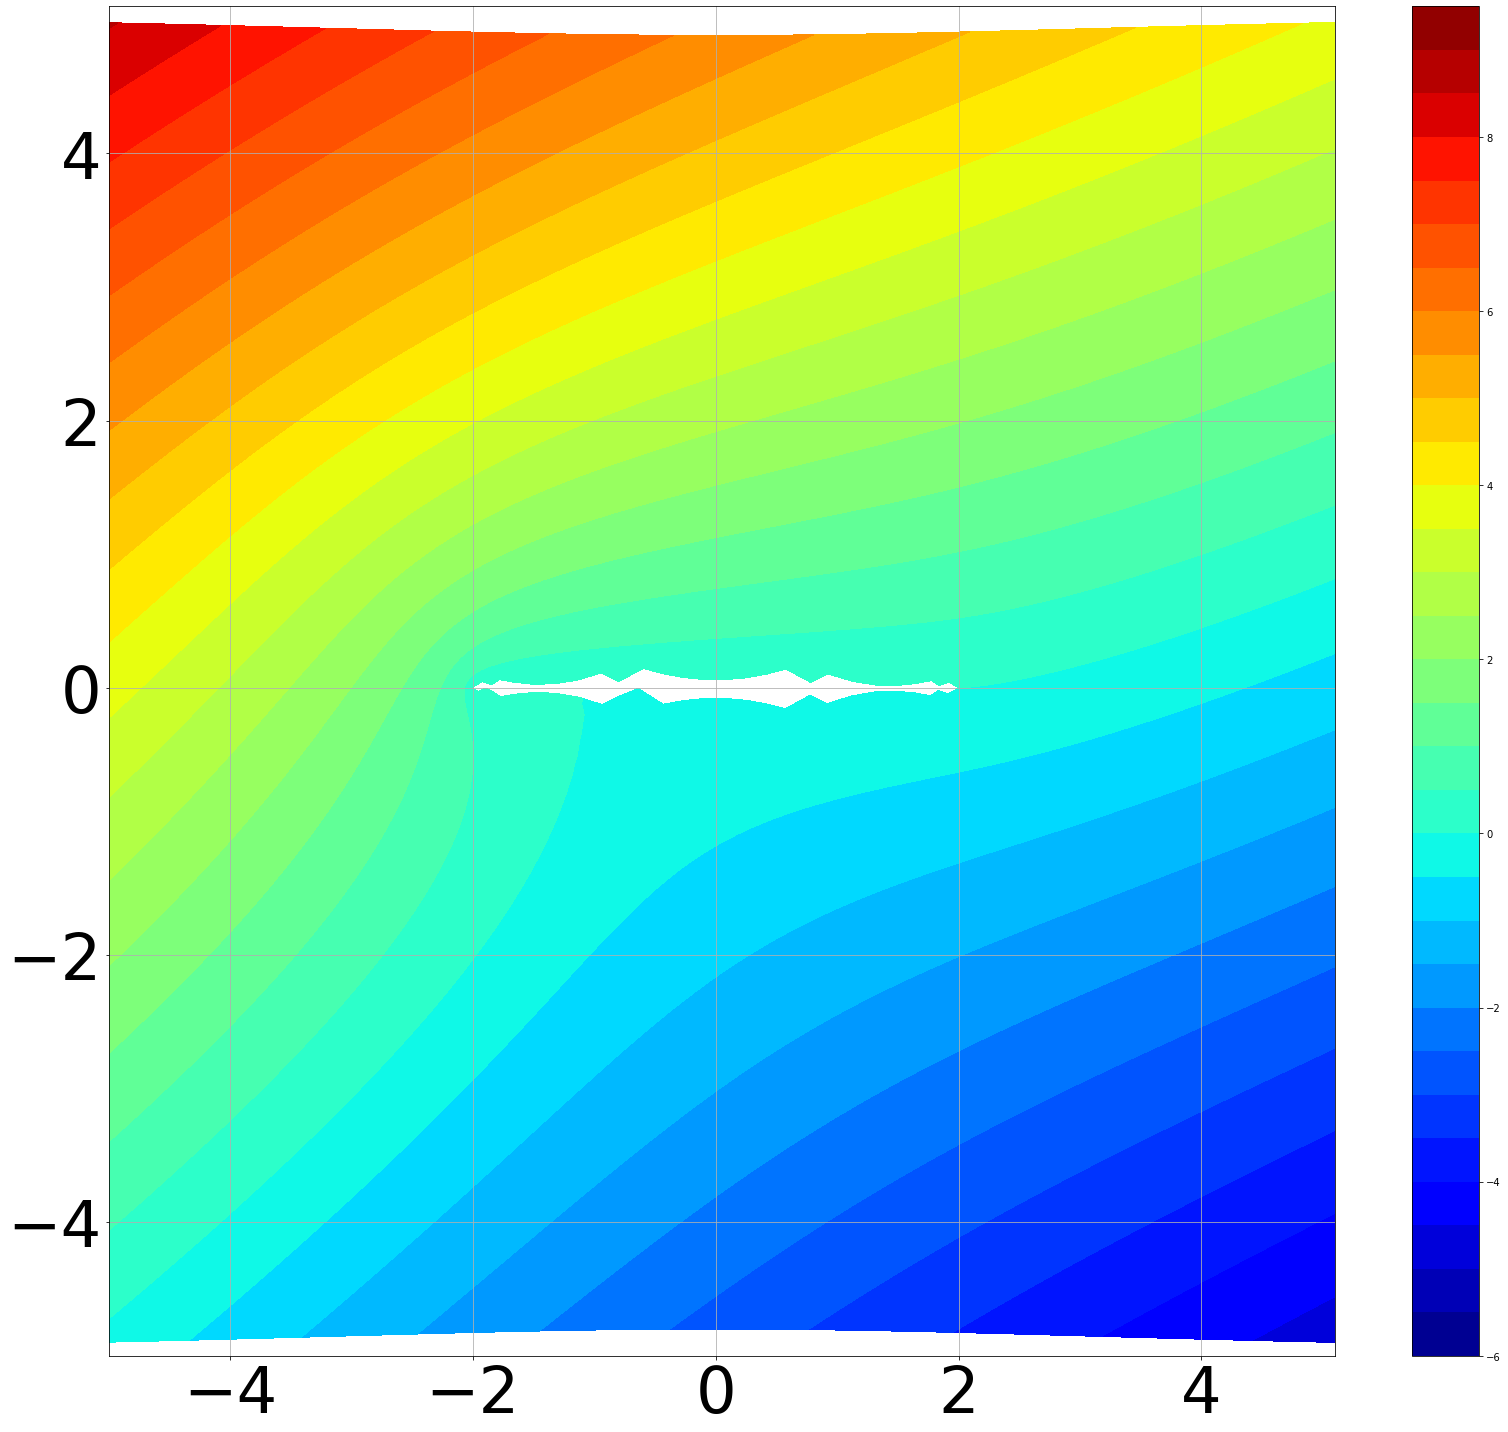

In [26]:
import numpy.ma as ma

xs,xe,xd=-5,5.1,0.09
ys,ye,yd=-5,5.1,0.09

x=np.arange(xs,xe,xd)
y=np.arange(ys,ye,yd)
x,y=np.meshgrid(x,y)

U=1.0
beta=0.5
a=1.0
kappa=2.*U*a*np.sin(beta)

rr=np.sqrt(x*x+y*y)
z=x+1.j*y
z1=z+1/z
w=U*np.exp(-1.j*beta)*z+(U*a*a*np.exp(1.j*beta))/z+kappa*1.j*np.log(z)
df=U*np.exp(-1.j*beta)-(U*a*a*np.exp(1.j*beta))/(z*z)+kappa*1.j/z
df=df*(z*z)/(z*z-a*a)
#df=U*(np.exp(-1.j*beta)*z+np.exp(1.j*beta)*a)/(z+a)
xx=z1.real
yy=z1.imag

sfc=w.imag
sfc=np.ma.masked_where(rr<a,sfc)
df=np.ma.masked_where(rr<a,df)

u=df.real
v=-1.0*df.imag
nn=np.sqrt(u*u+v*v)
nn=ma.masked_where(nn<1e-6,nn)
u=u/nn
v=v/nn

p=7
s=np.arange(-6,10,0.5)
plt.figure(figsize=(23,20),tight_layout=True)
plt.xlim(xs,xe)
plt.ylim(xs,xe)
plt.xticks(fontsize=64)
plt.yticks(fontsize=64)
plt.grid()
im=plt.contourf(xx,yy,sfc,levels=s,cmap='jet')
cbar=plt.colorbar(im)
t=cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(t,fontsize=64)
plt.contour(xx,yy,sfc,levels=s,colors=['k'])
plt.quiver(xx[::p,::p],yy[::p,::p],u[::p,::p],v[::p,::p])
fname='q30a.png'
plt.savefig(fname)
plt.show()

8.01


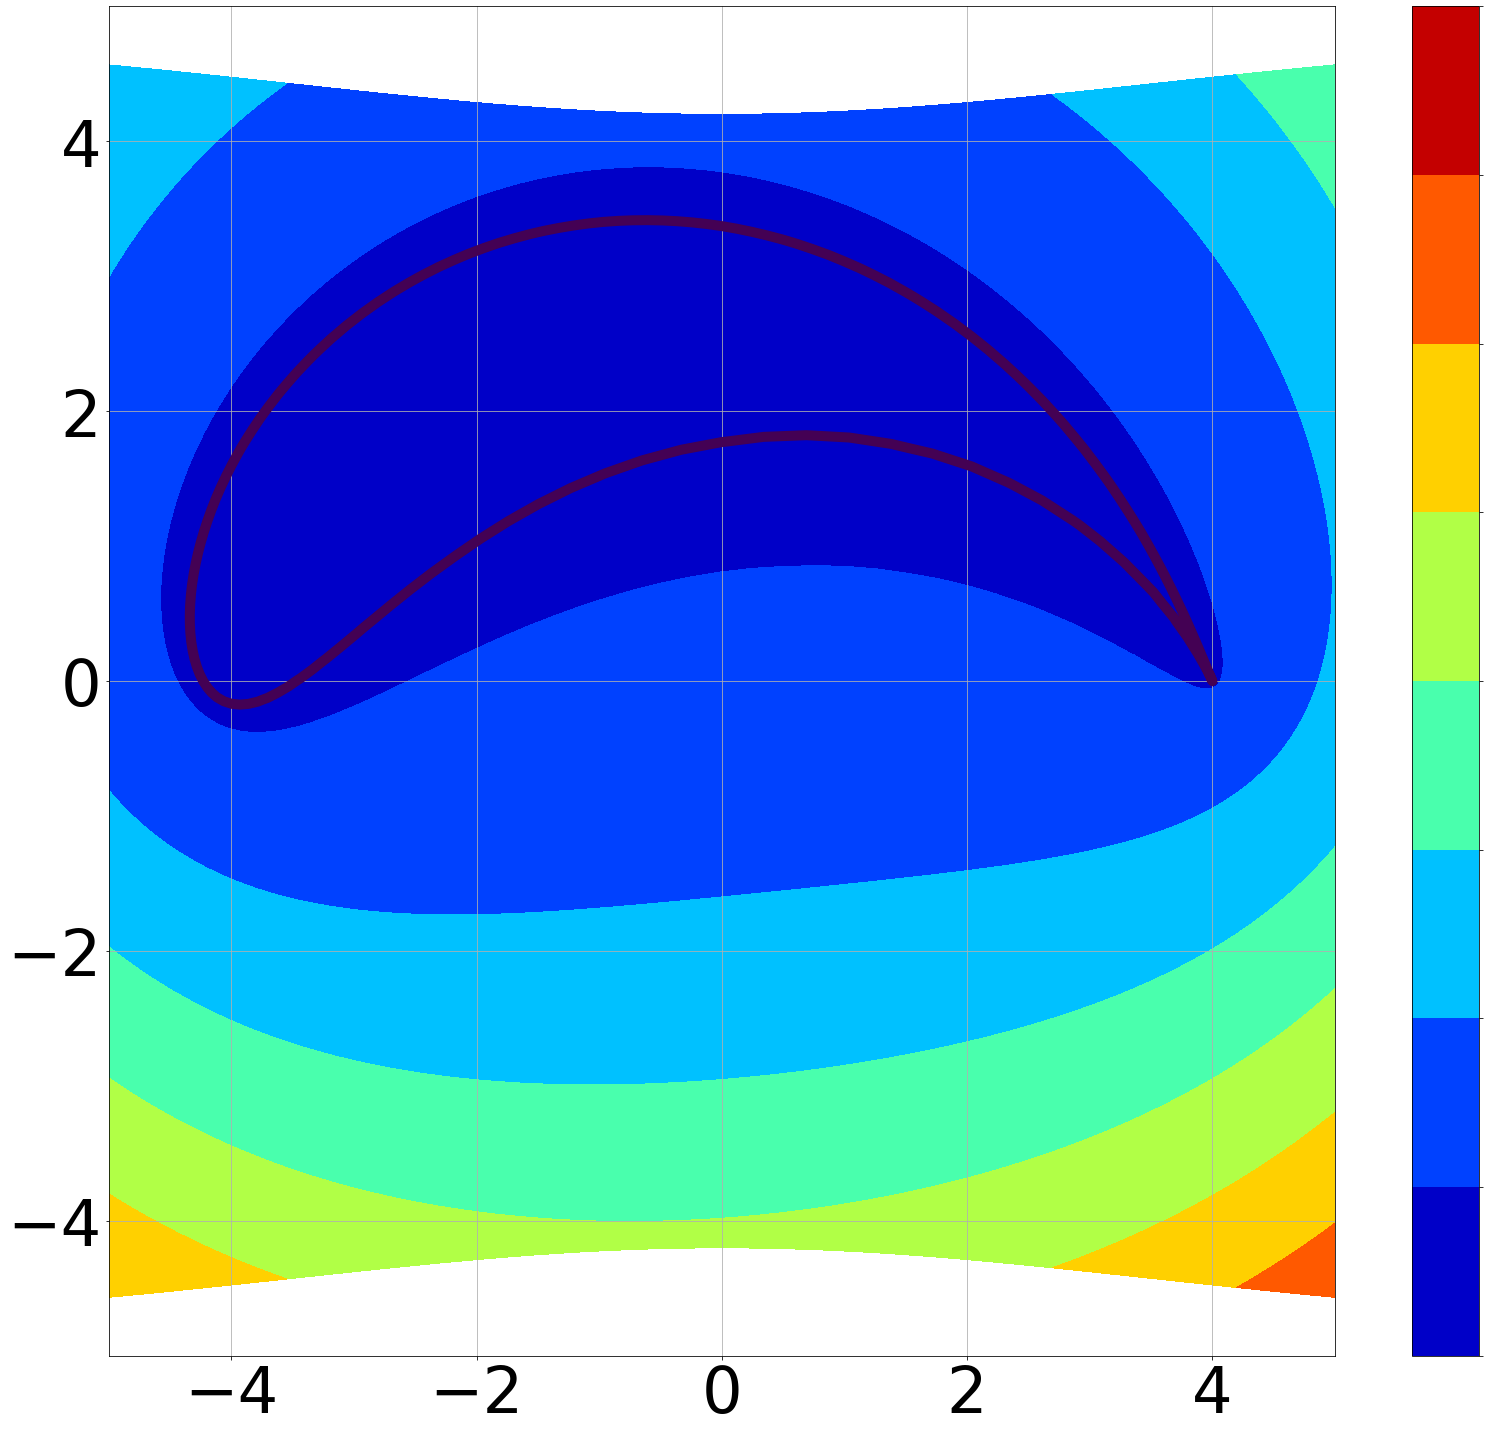

In [44]:
xs,xe,xd=-5,5.1,0.1
ys,ye,yd=-5,5.1,0.1
x=np.arange(xs,xe,xd)
y=np.arange(ys,ye,yd)
x,y=np.meshgrid(x,y)

x0,y0=-0.4,1.5
a=2.0
rr=(a-x0)*(a-x0)+y0*y0
print(rr)

f=(x-x0)*(x-x0)+(y-y0)*(y-y0)

z=x+1.j*y
w=z+(a*a)/z
xx=w.real
yy=w.imag

plt.figure(figsize=(23,20),tight_layout=True)
plt.xlim(-5.0,5.0)
plt.ylim(-5.0,5.0)
plt.xticks(fontsize=64)
plt.yticks(fontsize=64)
plt.grid()
im=plt.contourf(xx,yy,f,cmap='jet')
cbar=plt.colorbar(im)
t=cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels(t,fontsize=64)
plt.contour(xx,yy,f,levels=[rr],linewidths=[10])
plt.show()



In [10]:
X0,X1,dx=0,30,0.5
Y0,Y1,dy=0,15,0.5
x=np.arange(X0,X1,dx)
y=np.arange(Y0,Y1,dy)
x,y=np.meshgrid(x,y)

nx=x.shape[1]
ny=x.shape[0]
sf=np.zeros([ny,nx])
sf0=np.zeros([ny,nx])
u=np.zeros([ny,nx])
v=np.zeros([ny,nx])
abs_u=np.zeros([ny,nx])

U=1.0
s=np.arange(0,20,1.0)

for i in range(ny):
    for j in range(nx):
        sf[i,j]=U*y[i,j]

nx2=int(nx/2)
ny2=int(ny/2)
for j in range(nx2-2,nx2+3):
    for i in range(0,5):    
        sf[i,j]=U*y[0,0]

for k in range(101):
    for i in range(ny):
        for j in range(nx):
            sf0[i,j]=sf[i,j]
    for i in range(1,ny-1):
        for j in range(1,nx-1):
            sf[i,j]=0.25*(sf[i-1,j]+sf[i+1,j]+sf[i,j-1]+sf[i,j+1])
#            sf[i,j]=0.25*(sf0[i-1,j]+sf0[i+1,j]+sf0[i,j-1]+sf0[i,j+1])
    for j in range(nx2-2,nx2+3):
        for i in range(0,5):
            sf[i,j]=U*y[0,0]

df0=0.0
for i in range(ny):
    for j in range(nx):
        sa0=sf[i,j]-sf0[i,j]
        df0=df0+sa0*sa0
df0=np.log10(df0)
if k<1:
    xr=np.array([k])
    yr0=np.array([df0])
else:
    xr=np.append(xr,[k])
    yr0=np.append(yr0,[df0])

if k%20 == 0:
    print(k,df0)
    plt.figure(figsize=(20,10))
    plt.contour(x,y,sf,levels=s)
    plt.show()
    plt.close()

for i in range(1,ny-1):
    for j in range(1,nx-1):
        u[i,j]=(sf[i+1,j]-sf[i-1,j])/(2*dy)
        v[i,j]=-(sf[i,j+1]-sf[i,j-1])/(2*dx)

abs_u=np.sqrt(u*u+v*v)
u=u/abs_u
v=v/abs_u

s1=np.arange(0,2.0,0.1)
plt.figure(figsize=(20,35),tight_layout=True)
plt.subplot(3,1,1)
plt.contour(x,y,sf,levels=s,colors='k')
plt.subplot(3,1,2)
im=plt.contourf(x,y,abs_u,levels=s1,cmap='jet')
cbar=plt.colorbar(im,orientation='horizontal',pad=0.05)
t=cbar.ax.get_xticklabels()
cbar.ax.set_xticklabels(t,fontsize=64)
plt.quiver(x[::5,::5],y[::5,::5],u[::5,::5],v[::5,::5])
plt.subplot(3,1,3)
plt.xticks(fontsize=64)
plt.yticks(fontsize=64)
plt.ylim(-4,1)
plt.grid()
plt.plot(xr,yr0,linewidth=10)

out_img='q33b.png'
plt.savefig(out_img)
plt.show()
plt.close()


NameError: name 'xr' is not defined

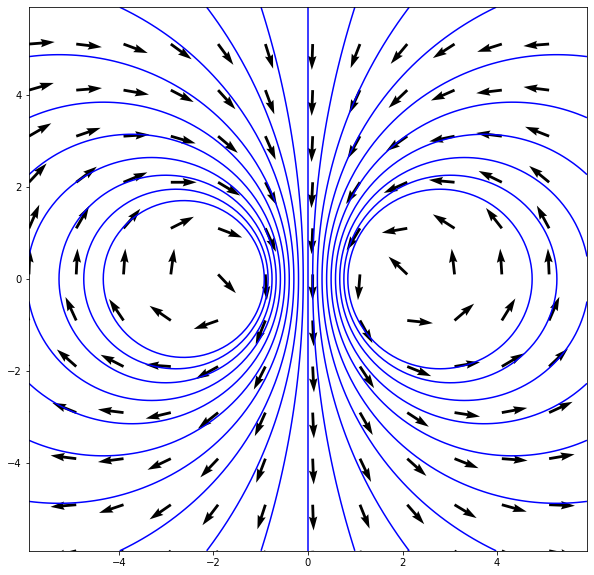

masked_array(
  data=[[0.05736016, 0.05827931, 0.0592099 , ..., 0.0592099 , 0.05827931,
         0.05736016],
        [0.05839545, 0.05934824, 0.06031339, ..., 0.06031339, 0.05934824,
         0.05839545],
        [0.05945217, 0.06043995, 0.0614411 , ..., 0.0614411 , 0.06043995,
         0.05945217],
        ...,
        [0.05945217, 0.06043995, 0.0614411 , ..., 0.0614411 , 0.06043995,
         0.05945217],
        [0.05839545, 0.05934824, 0.06031339, ..., 0.06031339, 0.05934824,
         0.05839545],
        [0.05736016, 0.05827931, 0.0592099 , ..., 0.0592099 , 0.05827931,
         0.05736016]],
  mask=False,
  fill_value=1e+20)

In [39]:
x=np.arange(-5.9,6.,0.1)
y=np.arange(-5.9,6.,0.1)
x,y=np.meshgrid(x,y)

k,a=1.0,2.0
v=-1.*k/(2.*a)
t=0
r=np.sqrt(x*x+y*y)
z1=(x+a)+1.j*(y-v*t)
z2=(x-a)+1.j*(y-v*t)
f=1.j*k*np.log(z1)-1.j*k*np.log(z2)
df=1.j*k/z1-1.j*k/z2

phi=f.real
psi=f.imag

u=df.real
v=-1.0*df.imag

nn=np.sqrt(u*u+v*v)
nn=ma.masked_where(nn<1e-6,nn)
u=u/nn
v=v/nn
s=np.arange(-1,1,0.1)
plt.figure(figsize=(10,10))
#plt.contour(x,y,phi,colors='r',levels=s, linestyles='dashed')
plt.contour(x,y,psi,colors='b',levels=s, linestyles='solid')
#plt.streamplot(x,y,u,v,color='k',density=0.5)
plt.quiver(x[::10,::10],y[::10,::10],u[::10,::10],v[::10,::10],pivot='tail')
#plt.quiver(x,y,u,v,pivot='tail')
fname='q26.png'
plt.savefig(fname)
plt.show()
nn



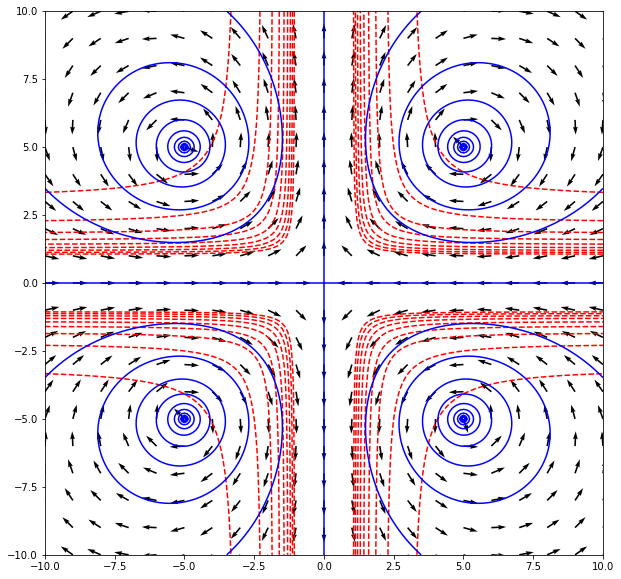

150 150 -0.04999999999999973 0.04999999999999973
150 50 0.05000000000000009 0.04999999999999974
50 50 0.05000000000000009 -0.05000000000000009
50 150 -0.04999999999999974 -0.050000000000000086


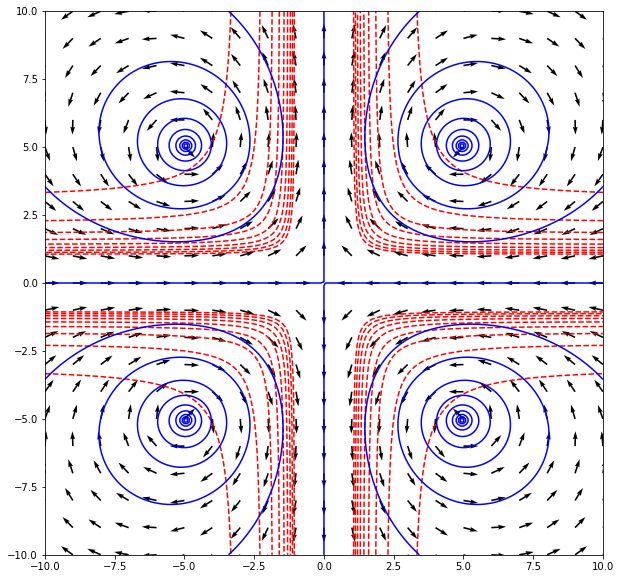

150 149 -0.04823352586917201 0.05128400745327161
150 50 0.0487462559711071 0.05124624346641926
49 50 0.04878349498298856 -0.051733963565150795
49 149 -0.04829652403480608 -0.05179598640565733


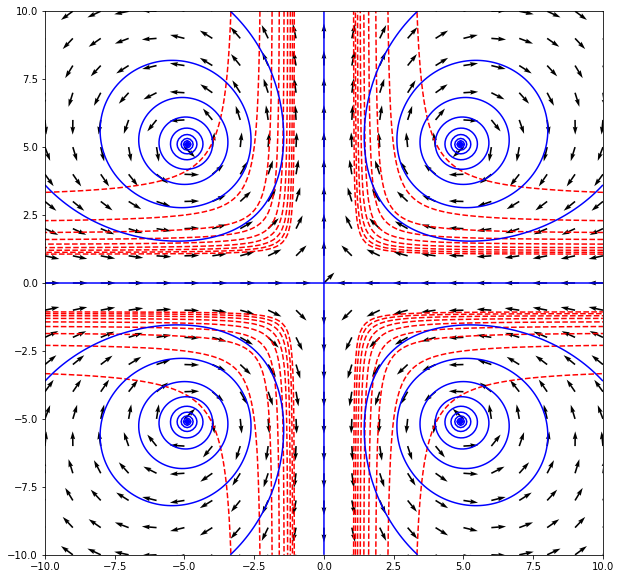

151 149 -0.04703579338763411 0.053039401523500354
151 50 0.04752640346280083 0.052952002415961825
48 50 0.0476116875855255 -0.053413566065740166
48 149 -0.047147291740221565 -0.05352344966791705


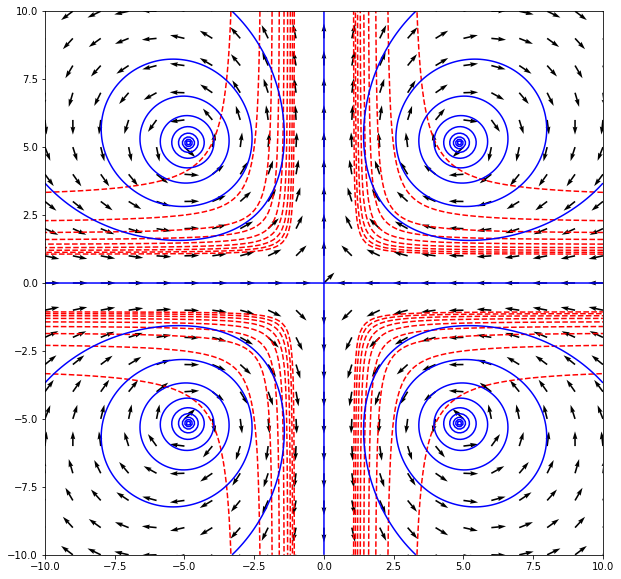

151 148 -0.04522642937175208 0.05439788626680879
151 51 0.04574519838522573 0.05425817369559192
48 51 0.04588069589436826 -0.054742426839642394
48 148 -0.04538993933145884 -0.0549041737579639


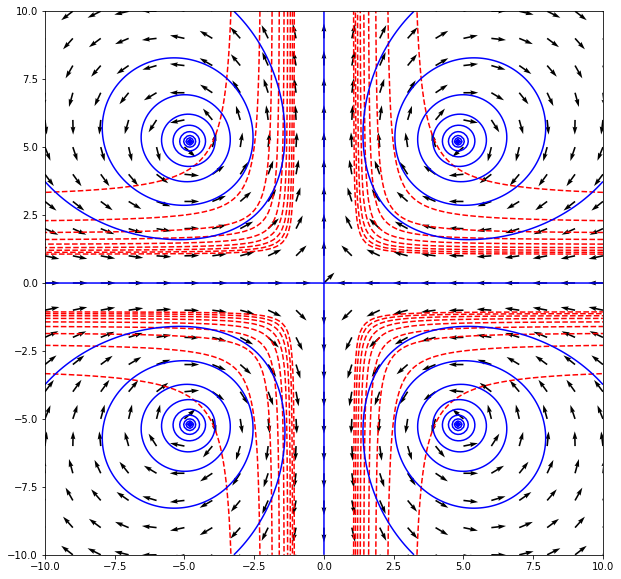

152 148 -0.04409314804705913 0.056118232334429946
152 51 0.04458961177604786 0.05593002462146216
47 51 0.04477117820751845 -0.05638880667748836
47 148 -0.04430314612252592 -0.05659727367383112


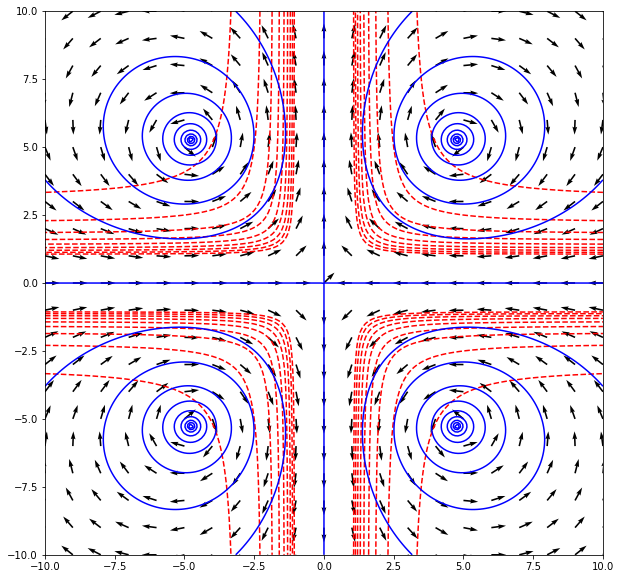

152 147 -0.042246938574475264 0.057542499239572074
152 52 0.04277199645605432 0.05730003445386213
47 52 0.043004565910697304 -0.05778201608100629
47 147 -0.042509737708480454 -0.058044276093150604


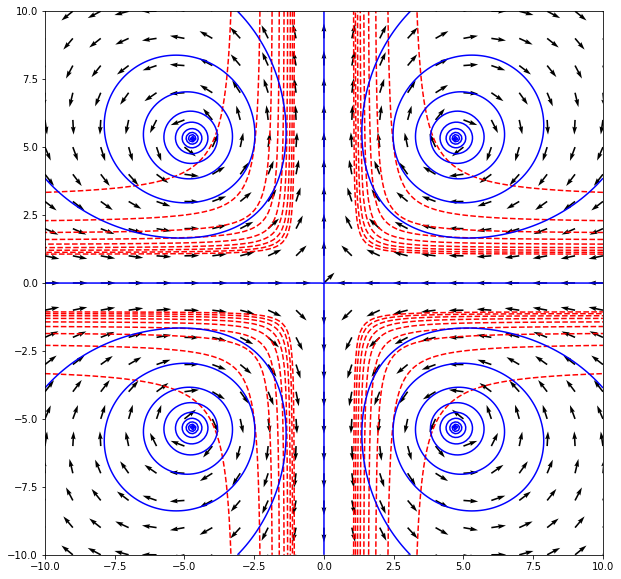

153 147 -0.04117694524750777 0.05922702249151712
153 52 0.04167934189310595 0.058937312848516485
46 52 0.04195594503927311 -0.0593946613232303
46 147 -0.041484156221855875 -0.05970239431778628


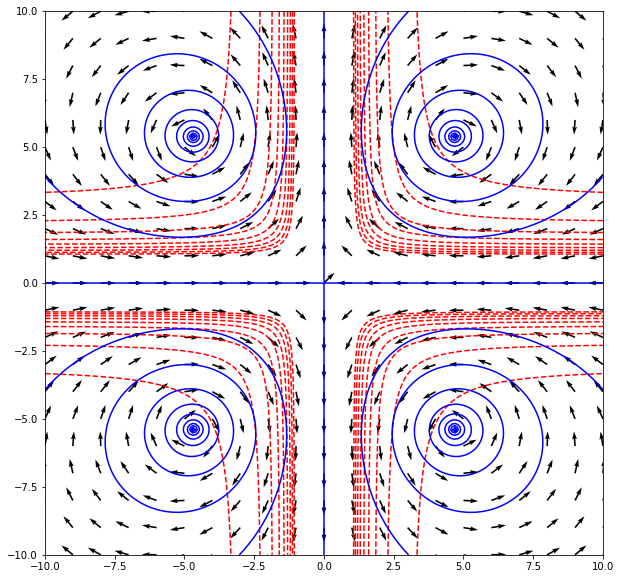

153 146 -0.039291944911221365 0.06071483741184836
153 53 0.039823344977503276 0.060368947319646704
46 53 0.040151507099663225 -0.06085031687044554
46 146 -0.039652512785848526 -0.06121376432286432


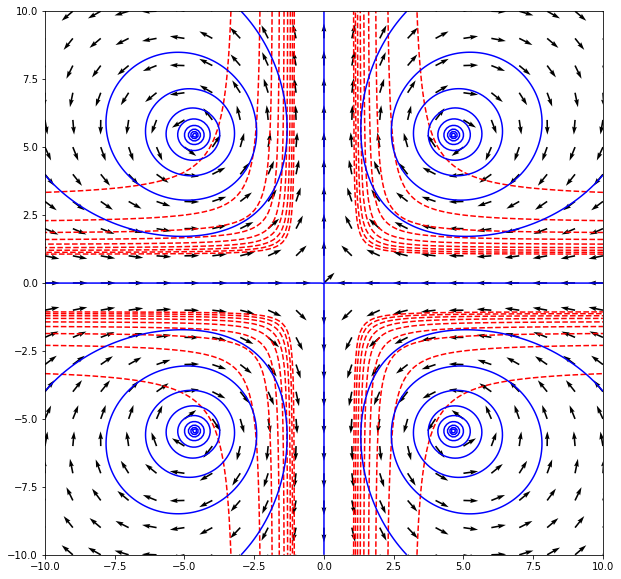

154 146 -0.03828330446900251 0.062362120021547146
154 53 0.03879155196619568 0.06197031809140145
45 53 0.03916163431213342 -0.06242806932069491
45 146 -0.03868612632448412 -0.06283566466291904


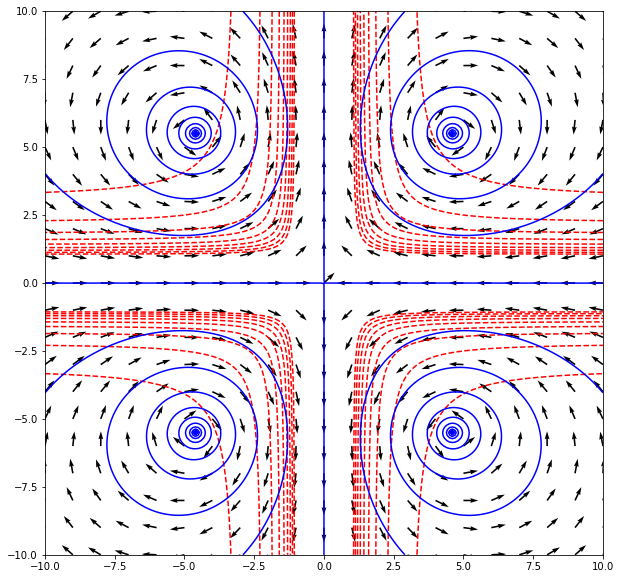

155 146 -0.03731086444475542 0.06396588265597844
155 53 0.03779597638368924 0.06352959200696343
44 54 0.037766147468366776 -0.06440791892881761
44 146 -0.03775447019625446 -0.06441533000916395


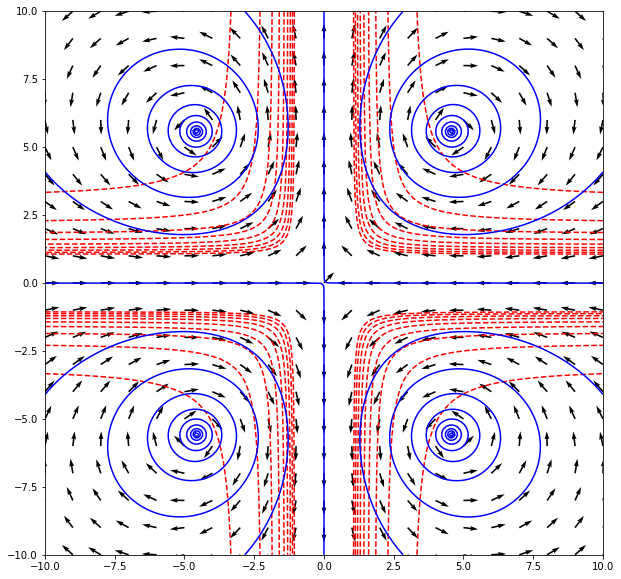

155 145 -0.03540428516154677 0.06553946447927966
155 54 0.035911766070155816 0.06503961982969203
44 54 0.0363774551341411 -0.06550386874466266
44 145 -0.03589323191383228 -0.06600667969556209


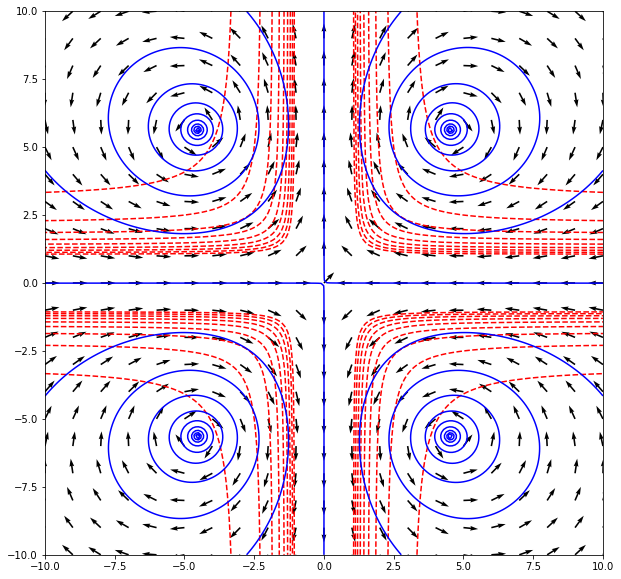

156 145 -0.03448879601503406 0.06710452193713093
156 54 0.034972552842139 0.06656186605791996
43 54 0.03547651776862757 -0.06700483271272101
43 145 -0.03501615428605807 -0.06754906495364287


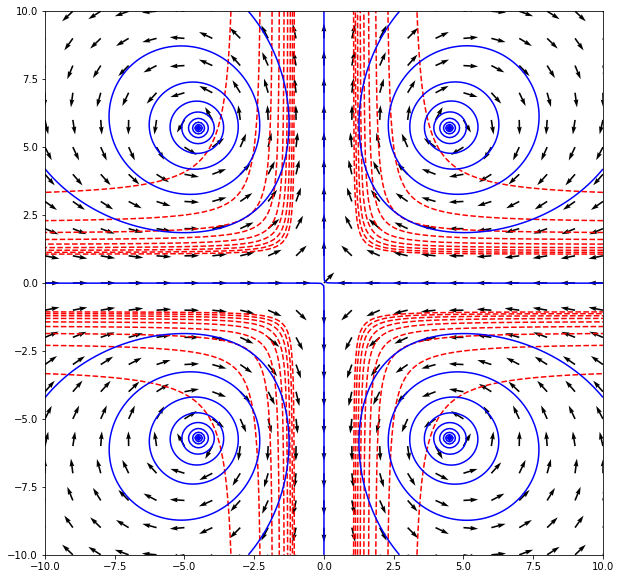

157 144 -0.033139181973021625 0.06922426153307946
156 55 0.03304687268714353 0.06812831692946532
42 55 0.034187009611904316 -0.06904314079131696
42 144 -0.033735417799438304 -0.06966267728042169


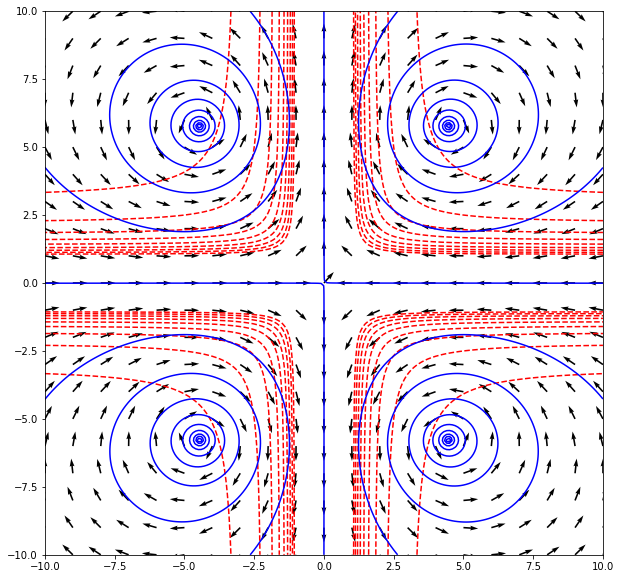

157 144 -0.031666566389429385 0.07026206522619112
157 55 0.03214833206305896 0.06962532610939455
42 55 0.03274392437656525 -0.070071280990113
42 144 -0.03227933557734618 -0.07071637481839194


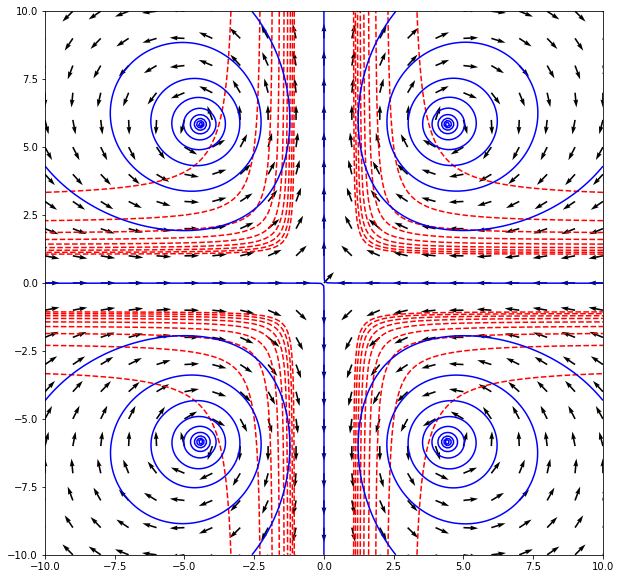

158 144 -0.03083611642968065 0.0717447128398698
158 55 0.03129349540846381 0.07106828750441502
41 55 0.03192356776225956 -0.07149579040361237
41 144 -0.031483654453073294 -0.07217939435765477


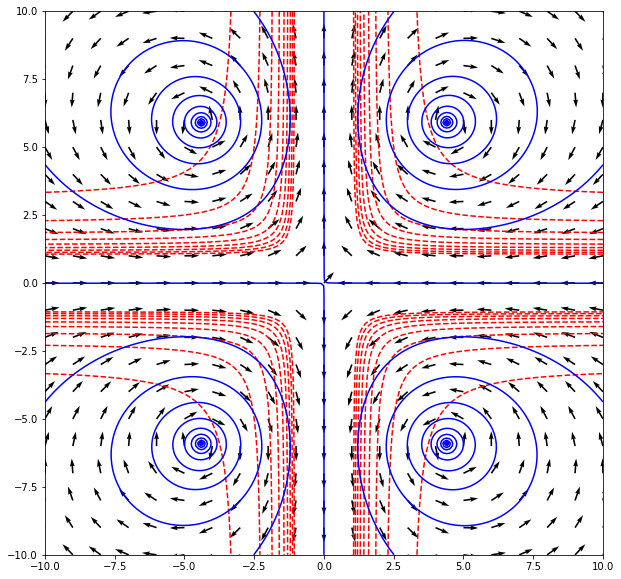

159 144 -0.030036412240586854 0.0731879477597274
159 56 0.030032734919779883 0.07316259048003554
40 56 0.030727739326403315 -0.07358689246843594
40 143 -0.030299799644078064 -0.07434549532689935


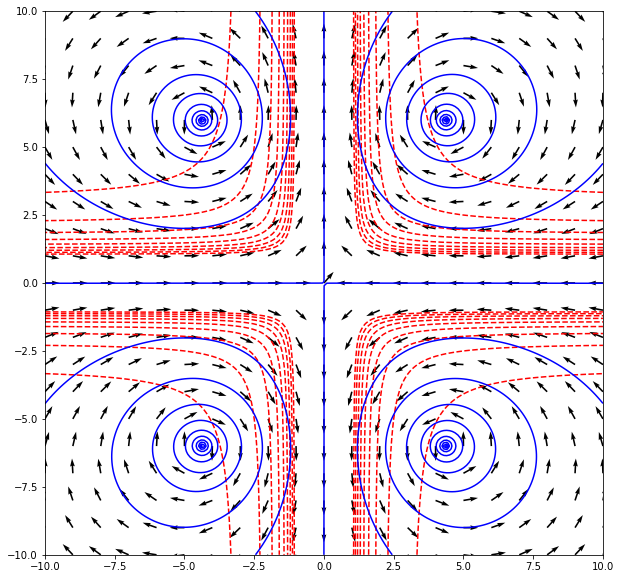

159 143 -0.028052474519324702 0.07489505912779086
159 56 0.028522044974011826 0.07412482924125074
40 56 0.029222831226198644 -0.07455648522406849
40 143 -0.028789762092677012 -0.07534431736948102


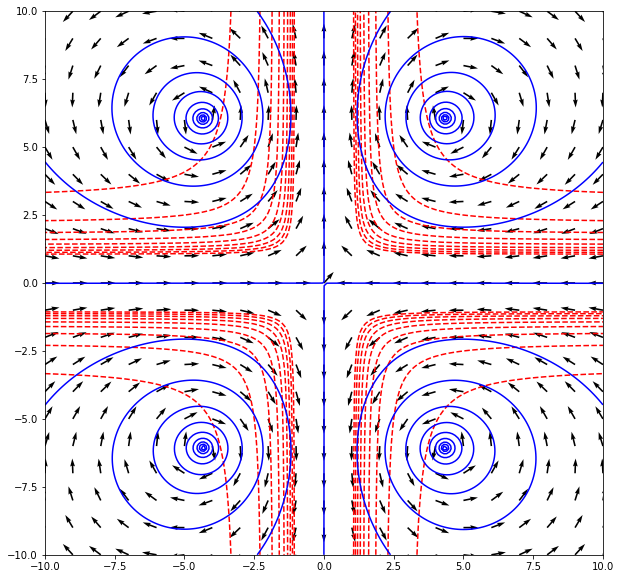

160 143 -0.027297214015677765 0.07629429637259401
160 56 0.02774176010884722 0.0754871391405477
39 56 0.028473180971887817 -0.07590363923163286
39 143 -0.028065475913426296 -0.0767268521894461


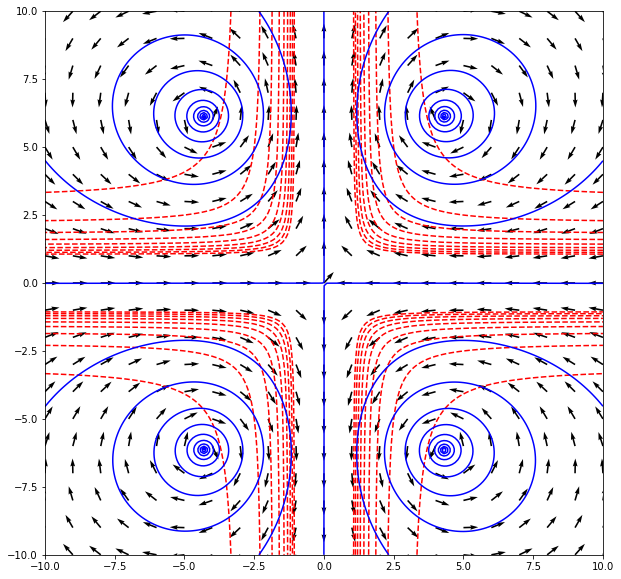

161 143 -0.026569334893231114 0.07765574039481697
161 56 0.02698873906252655 0.07681307619512152
38 56 0.027749585956838137 -0.0772157220765978
38 143 -0.027367331508893523 -0.07807293413802065


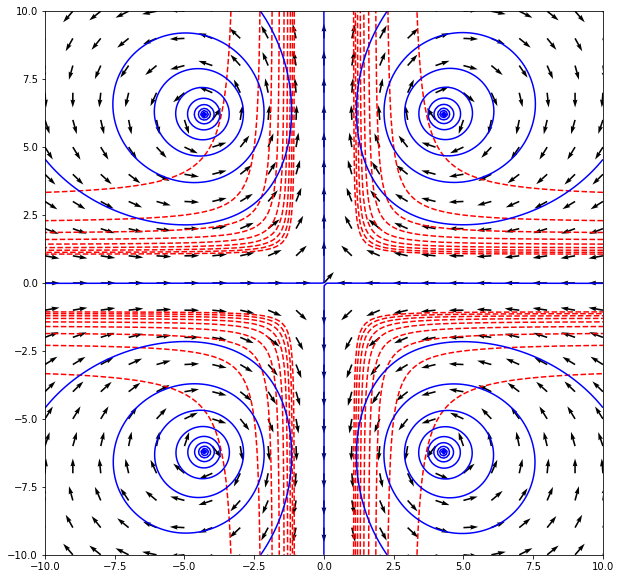

162 142 -0.025450813969509413 0.07986490568897629
162 57 0.025855766420098292 0.07894731347550553
37 57 0.02667732518106983 -0.07934971466415351
37 142 -0.026311251550145822 -0.08028032165524251


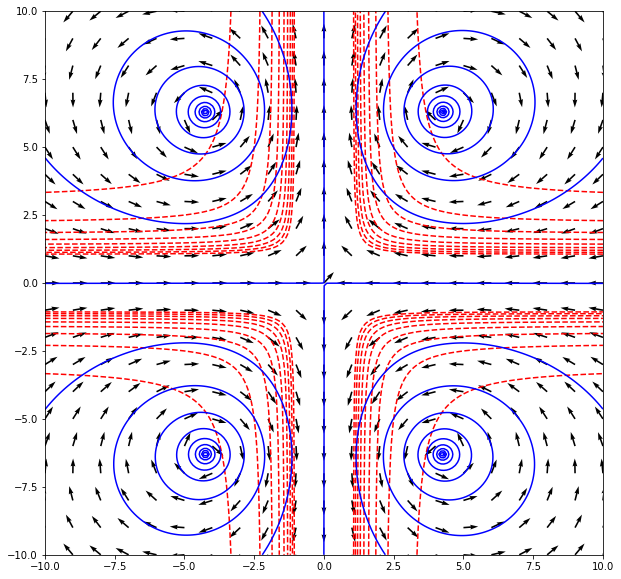

162 142 -0.023851004556305212 0.0807571802936515
162 57 0.024271559946958163 0.07981700354309118
37 57 0.025107699218407966 -0.08024090854726865
36 142 -0.02566702028713682 -0.08158208379036497


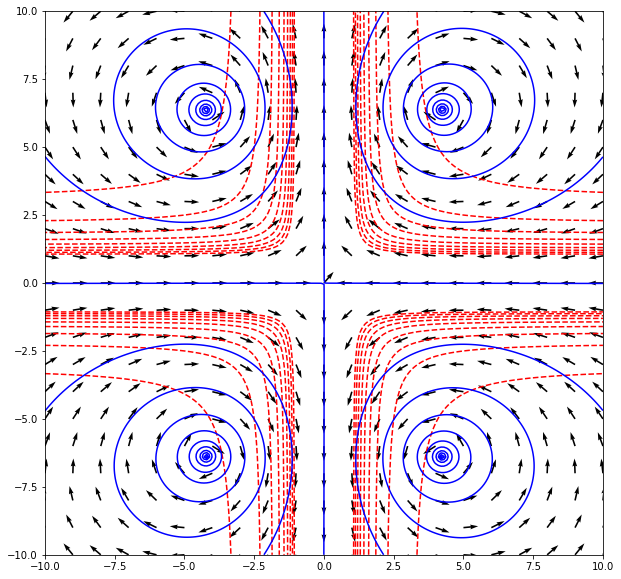

163 142 -0.023181554143794664 0.08204008438876527
163 57 0.02357543312077888 0.08106439711464389
36 57 0.024435092404378588 -0.0814876643204595
36 142 -0.024085204846038235 -0.08245919716484401


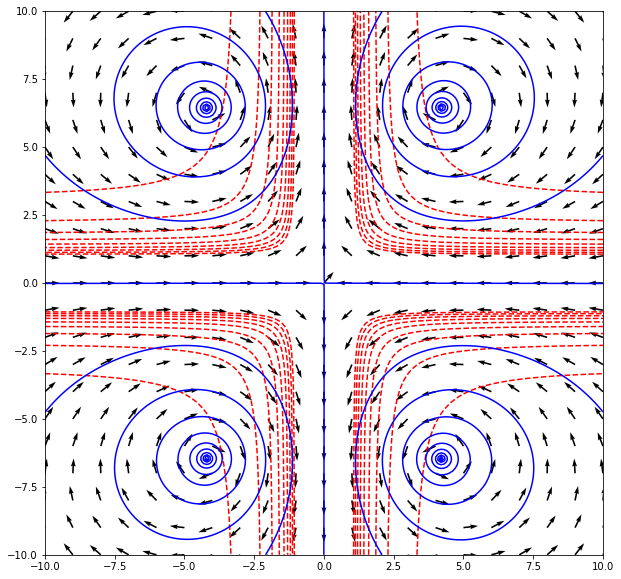

164 142 -0.022537288559851897 0.0832816258720931
164 57 0.022905005115243786 0.08227467647656245
35 58 0.023421507633440534 -0.08365844629780997
35 142 -0.02346548865431342 -0.08369020083950683


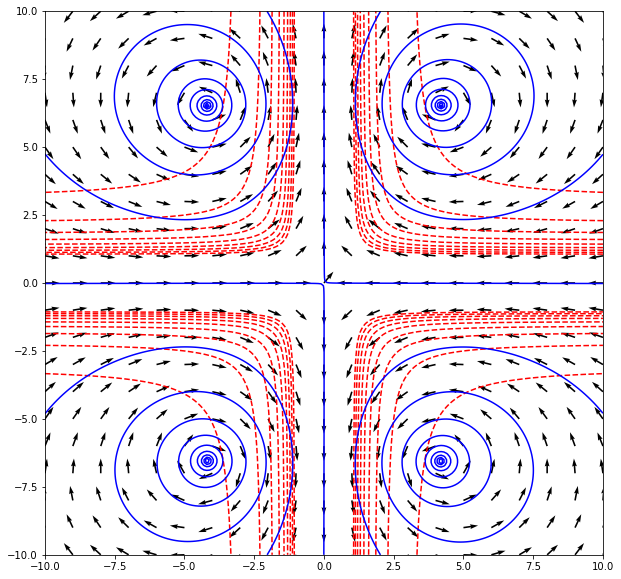

165 141 -0.021525944145834294 0.08552012100966125
165 58 0.021866253708751282 0.08443421648109256
34 58 0.022813010611597122 -0.08485481652765775
34 141 -0.022494940542501958 -0.0859229200958028


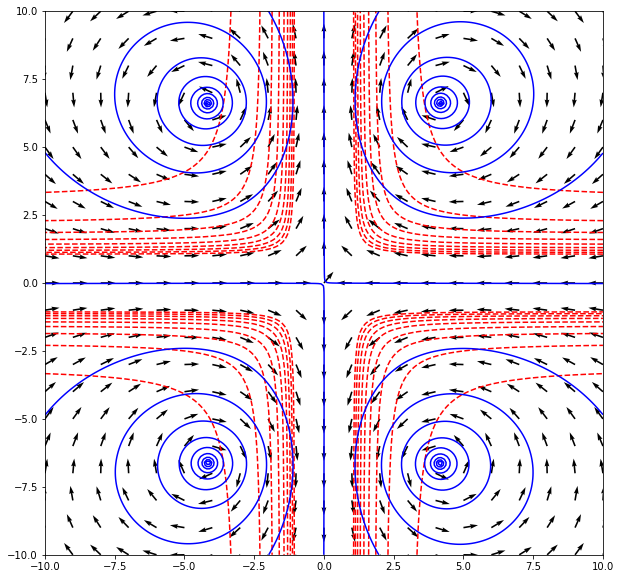

166 141 -0.020923939546148462 0.08671571425670212
166 58 0.021237032575981342 0.08560125988158268
33 58 0.022206014637506554 -0.08601515479922564
33 141 -0.021914934333271373 -0.08711094697320922


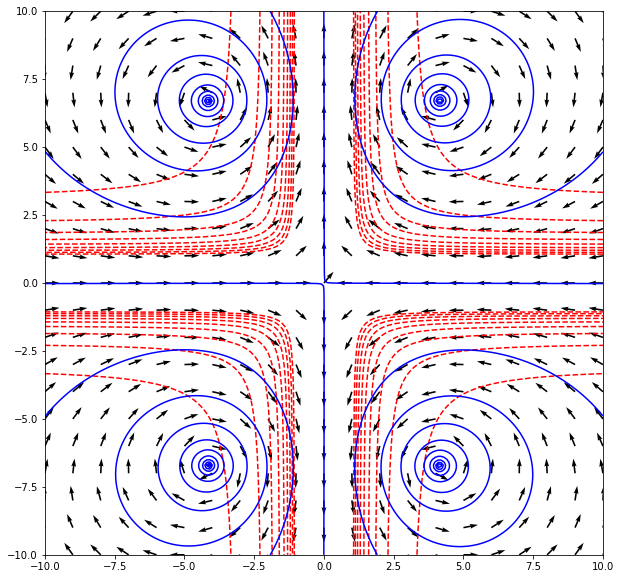

167 141 -0.020340382640566437 0.08787795700834938
166 58 0.01957586600780522 0.0863591450888834
32 58 0.021616360954863977 -0.08714467419883448
32 141 -0.021352314864121483 -0.08826693050772355


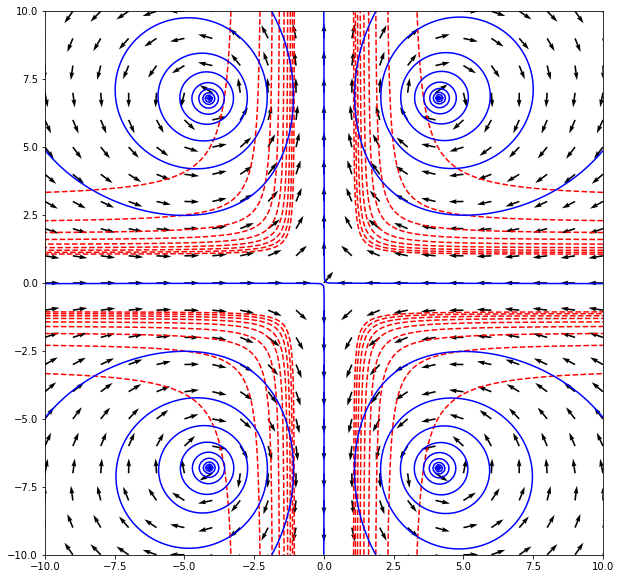

168 141 -0.019779741733727083 0.08899225052637007
167 58 0.018957974138706195 0.08747781701983315
32 58 0.019958532661438058 -0.08790992682916837
31 141 -0.0208089996650441 -0.08938855741245164


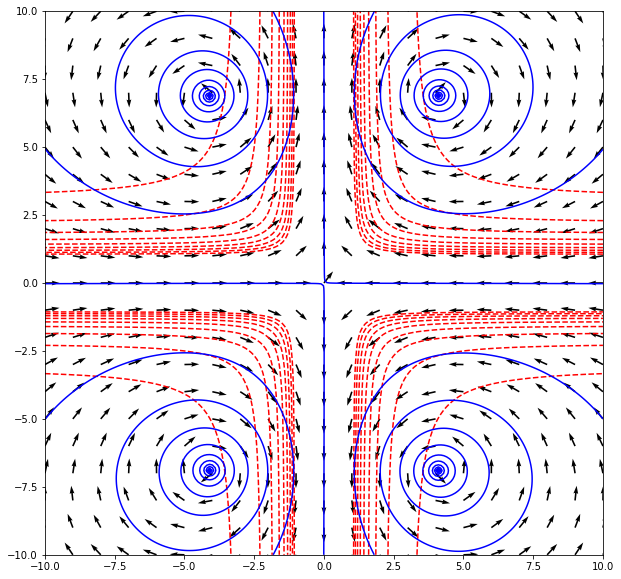

168 141 -0.018095235256091906 0.08971959476575068
168 58 0.018359488500565325 0.08855987019229464
31 59 0.01904072074132209 -0.09011526769978595
30 140 -0.019985743397427327 -0.09164250863421658


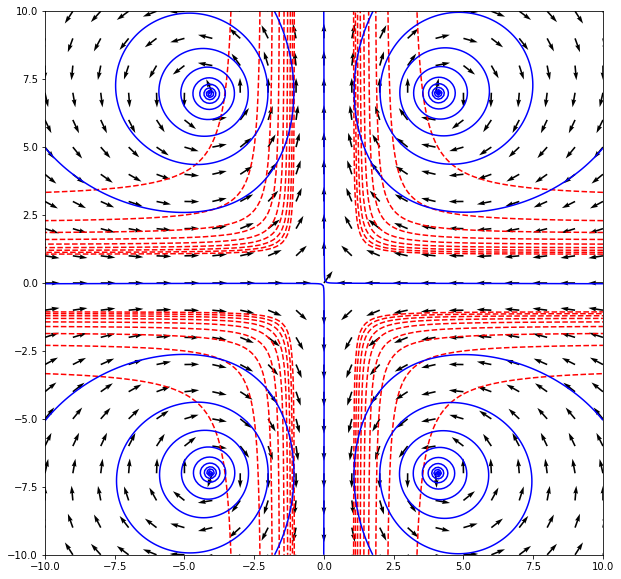

169 140 -0.01718199172283584 0.09196631711539106
169 59 0.017421639696367452 0.09073340844437464
30 59 0.018475888160012364 -0.09118073201937794
30 140 -0.01825689344858375 -0.09238971177165263


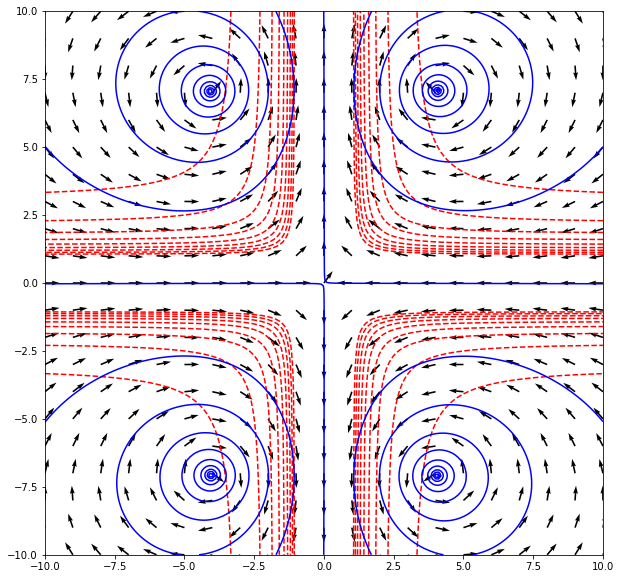

In [12]:
x0s,y0s=5.0,5.0
x1s,y1s=-1.0*x0s,y0s
x2s,y2s=-1.0*x0s,-1.0*y0s
x3s,y3s=x0s,-1.0*y0s
k0=1.0

xd=0.1
yd=xd

xs,xe=-10,10.1
ys,ye=-10,10.1

x=np.arange(xs,xe,xd)
y=np.arange(ys,ye,yd)
x,y=np.meshgrid(x,y)

s=np.arange(-10,10,0.5)
s1=np.arange(0,1,0.1)
p=10

dt=1.0

for k in range(30):
    if k>0:
        j=int((x0-xs)/xd)
        i=int((y0-ys)/yd)
        u0=df0.real
        v0=-1.0*df0.imag
        x0=x0+u0[i,j]*dt
        y0=y0+v0[i,j]*dt
        print(i,j,u0[i,j],v0[i,j])
        
        j=int((x1-xs)/xd)
        i=int((y1-ys)/yd)
        u1=df1.real
        v1=-1.0*df1.imag
        x1=x1+u1[i,j]*dt
        y1=y1+v1[i,j]*dt
        print(i,j,u1[i,j],v1[i,j])

        j=int((x2-xs)/xd)
        i=int((y2-ys)/yd)
        u2=df2.real
        v2=-1.0*df2.imag
        x2=x2+u2[i,j]*dt
        y2=y2+v2[i,j]*dt
        print(i,j,u2[i,j],v2[i,j])


        j=int((x3-xs)/xd)
        i=int((y3-ys)/yd)
        u3=df3.real
        v3=-1.0*df3.imag
        x3=x3+u3[i,j]*dt
        y3=y3+v3[i,j]*dt
        print(i,j,u3[i,j],v3[i,j])
    else:
        x0,y0=x0s,y0s
        x1,y1=x1s,y1s
        x2,y2=x2s,y2s
        x3,y3=x3s,y3s

    z0=(x-x0)+1.j*(y-y0)
    z1=(x-x1)+1.j*(y-y1)
    z2=(x-x2)+1.j*(y-y2)
    z3=(x-x3)+1.j*(y-y3)
    f=1.j*k0*np.log(z0)-1.j*k0*np.log(z1)+1.j*k0*np.log(z2)-1.j*k0*np.log(z3)
    f=ma.masked_invalid(f)
    df=1.j*k0/z0-1.j*k0/z1+1.j*k0/z2-1.j*k0/z3
    df=ma.masked_invalid(df)
    df0=-1.j*k0/z1+1.j*k0/z2-1.j*k0/z3
    df0=ma.masked_invalid(df0)
    df1=1.j*k0/z0+1.j*k0/z2-1.j*k0/z3
    df1=ma.masked_invalid(df1)    
    df2=1.j*k0/z0-1.j*k0/z1-1.j*k0/z3
    df2=ma.masked_invalid(df2)    
    df3=1.j*k0/z0-1.j*k0/z1+1.j*k0/z2
    df3=ma.masked_invalid(df3)

    phi=f.real
    psi=f.imag

    u=df.real
    v=-1.0*df.imag
    nn=np.sqrt(u*u+v*v)
    nn=ma.masked_where(nn<1e-6,nn)
    u=u/nn
    v=v/nn

    ff=1/(x*x)+1/(y*y)

    plt.figure(figsize=(10,10))
    plt.contour(x,y,ff,colors='r',levels=s1, linestyles='dashed')
    plt.contour(x,y,psi,colors='b',levels=s, linestyles='solid')
    #plt.streamplot(x,y,u,v,color='k',density=0.5)
    plt.quiver(x[::p,::p],y[::p,::p],u[::p,::p],v[::p,::p],pivot='tail')
    fname='q26.png'
    plt.savefig(fname)
    plt.show()
    plt.close()
